In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic-train.csv')

In [3]:
train.drop("Cabin",inplace=True,axis=1)

In [4]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [5]:
train['Age']= train[["Age", "Pclass"]].apply(add_age,axis=1)

In [6]:
train.dropna(inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [8]:
train['Sex'] = pd.get_dummies(train['Sex'],drop_first=True)

In [9]:
A = pd.get_dummies(train['Pclass'])

In [10]:
B= pd.get_dummies(train['Embarked'])

In [11]:
train = pd.concat([train,A,B],axis=1)

In [16]:
train.drop(['Name'],axis=1,inplace=True)

In [17]:
train.head()

,Survived,Sex,Age,SibSp,Parch,1,2,3,C,Q,S
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,1,0,0,0,0,1
4,0,1,35.0,0,0,0,0,1,0,0,1


In [421]:
train.drop([1,'C'],axis=1,inplace=True)

In [422]:
train['Survived'].sum()

340

In [424]:
x = train[['Age','SibSp','Parch',2,3,'Q','S','Sex']]
x = np.c_[np.ones(x.shape[0]), x] 

In [425]:
x

array([[ 1., 22.,  1., ...,  0.,  1.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 1., 25.,  1., ...,  0.,  1.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 1., 32.,  0., ...,  1.,  0.,  1.]])

In [426]:
y = np.array(train['Survived']).reshape(len(train['Survived']),1)

In [449]:
theta = np.random.randn(x.shape[1],1)


In [450]:
theta

array([[-2.10006503],
       [ 0.59844187],
       [ 0.07838794],
       [ 0.30463202],
       [-0.99361344],
       [-0.807963  ],
       [-0.33736605],
       [ 2.46757253],
       [-1.13755919]])

In [451]:
def sig(z):
    
    return 1 / (1 + np.e**(-z))

In [452]:
def cost_function(X,y,theta):
    
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(sig(x.dot(theta))) + (1 - y) * np.log(1 - sig(x.dot(theta))))
    return total_cost


In [453]:
def gradient_descent (X,y,theta,learn_rate=0.01,iteration = 1000): 
    m = len(y) 
    cost_history = np.zeros(iteration) 
    theta_history = np.zeros((iteration,X.shape[1])) 
    
    for i in range(iteration):
        
        h = sig(X.dot(theta)) 
        theta = theta - (1/m)*learn_rate*(np.dot(X.T,h-y)) 
        theta_history[i,:] = theta.T 
        cost_history[i] = cost_function(X,y,theta) 
        
    return theta, cost_history, theta_history

In [454]:
theta, cost_history, theta_history = gradient_descent(x,y,theta,learn_rate=0.001,iteration=1000)

<ipython-input-452-914f4c48b84c>:4: RuntimeWarning: divide by zero encountered in log
  total_cost = -(1 / m) * np.sum(y * np.log(sig(x.dot(theta))) + (1 - y) * np.log(1 - sig(x.dot(theta))))
<ipython-input-452-914f4c48b84c>:4: RuntimeWarning: invalid value encountered in multiply
  total_cost = -(1 / m) * np.sum(y * np.log(sig(x.dot(theta))) + (1 - y) * np.log(1 - sig(x.dot(theta))))


In [455]:
theta

array([[-2.07665009],
       [ 0.02649334],
       [ 0.03168484],
       [ 0.28728968],
       [-0.97422907],
       [-0.83898034],
       [-0.31011346],
       [ 2.38677558],
       [-1.20397102]])

In [456]:
cost_history[-1]

0.7266121226960889

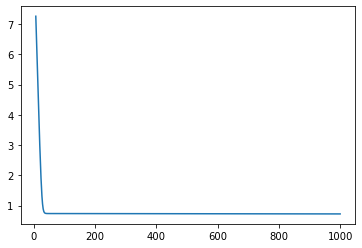

In [457]:
plt.plot(cost_history)

In [458]:
final_prediction = sig(x.dot(theta))
final_prediction = final_prediction.reshape(final_prediction.shape[0],1)
final_prediction[final_prediction>=0.6]=1
final_prediction[final_prediction<0.6]=0

In [459]:
t= final_prediction-y 
t[t==0].shape[0]*100/889

65.80427446569179